<a href="https://colab.research.google.com/github/kritsid/tensorflow/blob/master/tensor2_0CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

'2.2.0'

In [0]:
class_names = ['airplane','automobile','bird','cat','door','dog','frog','horse','ship','truck']

In [6]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [7]:
X_train.shape#3 corresponds to rgb scale,32*32 are the dim of images.

(50000, 32, 32, 3)

In [0]:
X_train = X_train/255.0 #convertng all pixels between 0 and 1
X_test = X_test /255.0

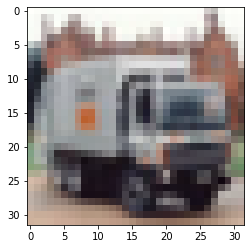

In [9]:
plt.imshow(X_test[11])#imshow() method from matplotlib

In [0]:
model = tf.keras.models.Sequential()

diff between valid as same for padding:
size of output shoulb be same as input by adding zeroes while striding as we may miss any column and doesnt get max out of some of data.

pool_size,strides,paddingactivation,input_shape are hyper parameters.
for conv2d layer

In [0]:
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size=3,padding = "same",activation ="relu",input_shape=[32,32,3]))

In [0]:
# adding 2nd layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3,padding="same",activation="relu"))
# kernel_size is size of filter i.e 3 by 3 

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))


maxp00l layer:
pool_size,strides,padding are hyper parameters.




In [0]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size = 3,padding="same",activation="relu"))


In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))


In [0]:
# flattening
model.add(tf.keras.layers.Flatten())#keras.ayers is just a module

In [0]:
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
# 128 is no. of hidden neurons im the layer

In [0]:
# output layer::
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [27]:
model.fit(x=X_train,y=y_train,epochs=1)    

1563/1563 [==============================] - 176s 113ms/step - loss: 0.8424 - accuracy: 0.7058


In [28]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)


313/313 [==============================] - 9s 29ms/step - loss: 0.9202 - accuracy: 0.6897


In [29]:
test_accuracy

0.6897000074386597